In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
awdf_tratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

awdf_tratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [14]:
awdf_tratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [15]:
awdf_tbasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

awdf_tbasics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [16]:
awdf_tbasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [18]:
leftjoin_rating_basics = awdf_tratings.set_index('tconst').join(awdf_tbasics.set_index('tconst'), how='left', lsuffix='1', rsuffix='2')

leftjoin_rating_basics

# left joining on the ratings and basics tables since we care about the ratings of movies more than just movies that may or may not have a
# rating in these data sets. Every rating has a movie associated with it, but not vice versa

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"
...,...,...,...,...,...,...,...
tt9805820,8.1,25,Caisa,Caisa,2018,84.0,Documentary
tt9844256,7.5,24,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi"
tt9851050,4.7,14,Sisters,Sisters,2019,NaN,"Action,Drama"


In [19]:
leftjoin_rating_basics.duplicated().sum() #No duplicates listed

0

In [20]:
leftjoin_rating_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    73856 non-null  float64
 1   numvotes         73856 non-null  int64  
 2   primary_title    73856 non-null  object 
 3   original_title   73856 non-null  object 
 4   start_year       73856 non-null  int64  
 5   runtime_minutes  66236 non-null  float64
 6   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 7.0+ MB


In [69]:
# sorted_numvotes = leftjoin_rating_basics.sort_values(by='numvotes', ascending=False)

sorted_numvotes.head(100) #top movies by number of votes (people who've seen the movie)

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...
tt3253232,5.0,492,The Bounce Back,The Bounce Back,2016,104.0,"Comedy,Romance"
tt2185846,3.0,492,Morangos com Açúcar - O Filme,Morangos com Açúcar - O Filme,2012,97.0,"Comedy,Drama,Family"
tt1707384,6.2,492,High School Debut,Kôkô debyû,2011,93.0,"Comedy,Romance"


In [88]:
top_numgenres = sorted_numvotes.head(100).copy()

top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...
tt0470752,7.7,424542,Ex Machina,Ex Machina,2014,108.0,"Drama,Mystery,Sci-Fi"
tt1659337,8.0,422671,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,Drama
tt1800241,7.2,418221,American Hustle,American Hustle,2013,138.0,"Crime,Drama"


In [89]:
top_numgenres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, tt1375666 to tt1291584
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    100 non-null    float64
 1   numvotes         100 non-null    int64  
 2   primary_title    100 non-null    object 
 3   original_title   100 non-null    object 
 4   start_year       100 non-null    int64  
 5   runtime_minutes  100 non-null    float64
 6   genres           100 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 6.2+ KB


In [90]:
top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...
tt0470752,7.7,424542,Ex Machina,Ex Machina,2014,108.0,"Drama,Mystery,Sci-Fi"
tt1659337,8.0,422671,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,Drama
tt1800241,7.2,418221,American Hustle,American Hustle,2013,138.0,"Crime,Drama"


In [91]:
top_numgenres.duplicated().sum() #no duplicates

0

In [92]:
top_numgenres = pd.concat([top_numgenres, top_numgenres['genres'].str.split(',', expand=True)], axis=1)
#split 'genres' into separate columns for each comma-separated genre listed
top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,0,1,2
tconst,,,,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",Action,Thriller,None
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",Adventure,Drama,Sci-Fi
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",Drama,Western,None
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...
tt0470752,7.7,424542,Ex Machina,Ex Machina,2014,108.0,"Drama,Mystery,Sci-Fi",Drama,Mystery,Sci-Fi
tt1659337,8.0,422671,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,Drama,Drama,None,None
tt1800241,7.2,418221,American Hustle,American Hustle,2013,138.0,"Crime,Drama",Crime,Drama,None


In [93]:
#drop 'genres' column

top_numgenres.drop('genres',axis=1, inplace=True)

top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,0,1,2
tconst,,,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,Action,Adventure,Sci-Fi
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Action,Thriller,None
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,Adventure,Drama,Sci-Fi
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,Drama,Western,None
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...
tt0470752,7.7,424542,Ex Machina,Ex Machina,2014,108.0,Drama,Mystery,Sci-Fi
tt1659337,8.0,422671,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,Drama,None,None
tt1800241,7.2,418221,American Hustle,American Hustle,2013,138.0,Crime,Drama,None


In [94]:
top_numgenres.rename(columns = {0:'genre 1', 1:'genre 2', 2:'genre 3'}, inplace=True)

top_numgenres

,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genre 1,genre 2,genre 3
tconst,,,,,,,,,
tt1375666,8.8,1841066,Inception,Inception,2010,148.0,Action,Adventure,Sci-Fi
tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,Action,Thriller,None
tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,Adventure,Drama,Sci-Fi
tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,Drama,Western,None
tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...
tt0470752,7.7,424542,Ex Machina,Ex Machina,2014,108.0,Drama,Mystery,Sci-Fi
tt1659337,8.0,422671,The Perks of Being a Wallflower,The Perks of Being a Wallflower,2012,103.0,Drama,None,None
tt1800241,7.2,418221,American Hustle,American Hustle,2013,138.0,Crime,Drama,None


In [95]:
genre_list = ['genre 1', 'genre 2', 'genre 3']
top_numgenres_count = {}

for var in genre_list:
    for genre in top_numgenres[var]:
        if genre != None:
            top_numgenres_count[genre] = top_numgenres_count.get(genre, 0) + 1


In [96]:
top_numgenres_count

{'Action': 54,
 'Adventure': 57,
 'Drama': 36,
 'Biography': 8,
 'Mystery': 11,
 'Comedy': 20,
 'Crime': 11,
 'Animation': 5,
 'Thriller': 13,
 'Western': 1,
 'Family': 2,
 'Sci-Fi': 36,
 'Music': 2,
 'Fantasy': 16,
 'Romance': 4,
 'Sport': 1,
 'History': 3,
 'Horror': 1}

In [97]:
df_top_genres = pd.DataFrame({'top genres': [var for var in top_numgenres_count.keys()],
                              'values': [var for var in top_numgenres_count.values()]})

df_top_genres = df_top_genres.sort_values(by='values', ascending=False)

df_top_genres

,top genres,values
1,Adventure,57
0,Action,54
2,Drama,36
11,Sci-Fi,36
5,Comedy,20
13,Fantasy,16
8,Thriller,13
4,Mystery,11
6,Crime,11
3,Biography,8


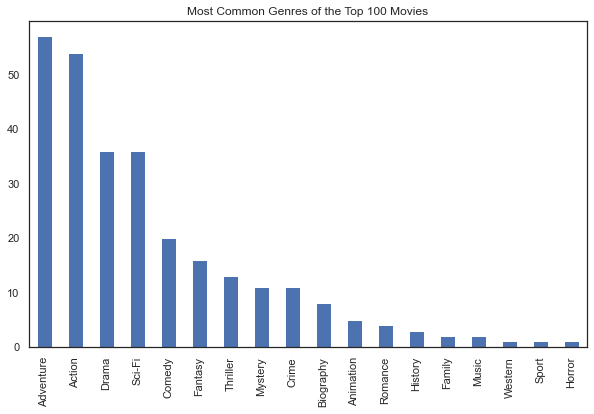

In [107]:
# fig, ax = plt.subplots(figsize=(10,6))
ax = df_top_genres.plot.bar(x='top genres', y='values', legend=None, figsize=(10,6))
plt.title('Most Common Genres of the Top 100 Movies')
ax.set(xlabel=None)
plt.savefig('Genres_Most_Common', bbox_inches='tight')

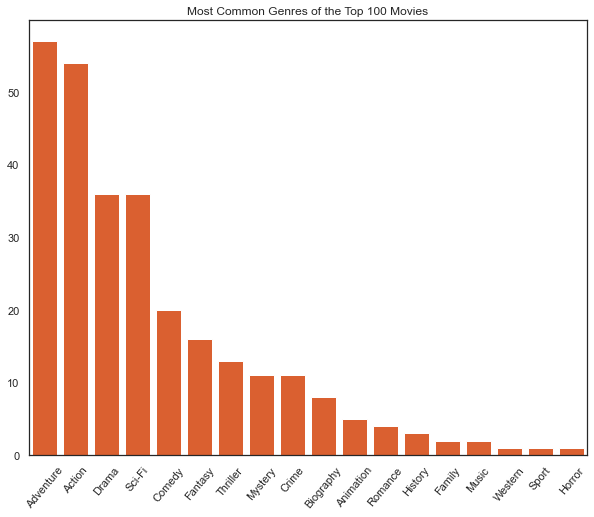

In [106]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style("white")
ax = sns.barplot(x='top genres', y='values', data= df_top_genres, color= '#F65314')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50);
ax.set(xlabel=None)
ax.set_ylabel(ylabel=None)
ax.set_title('Most Common Genres of the Top 100 Movies');

(6.8, 9.0, 600000.0, 2000000.0)

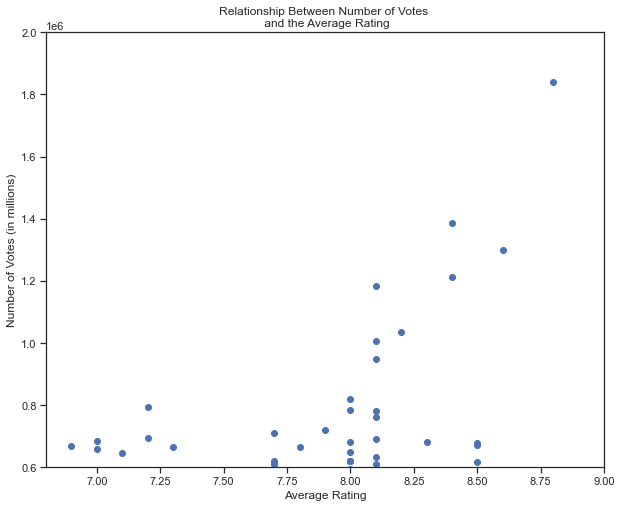

In [109]:
x = top_numgenres['averagerating']
y = top_numgenres['numvotes']
                                       
plt.scatter(x, y)
plt.title('Relationship Between Number of Votes \n and the Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes (in millions)')
plt.axis([6.8, 9.0, 600000, 2000000])

In [110]:
top_numgenres.describe() 

# mean runtime of the top 20 movies by number of votes is a little over 138 minutes, which isn't too far off from the median time of
# 140 minutes

,averagerating,numvotes,start_year,runtime_minutes
count,100.000000,1.000000e+02,100.000000,100.00000
mean,7.671000,6.065208e+05,2013.250000,127.99000
std,0.517823,2.247789e+05,2.212796,20.00227
min,6.000000,4.037550e+05,2010.000000,91.00000
25%,7.300000,4.715730e+05,2011.750000,113.75000
50%,7.700000,5.401670e+05,2013.000000,127.50000
75%,8.000000,6.596660e+05,2015.000000,141.25000
max,8.800000,1.841066e+06,2019.000000,181.00000
